In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Herhaling binomiale verdeling

Herhaling vorige les: wat is de kans op 2 keer succes bij een binomiale verdeling met n = 20 en p = 0.2?

In [21]:
def bernouilli(p):
    prob = np.random.random()
    if prob <= p:
        return 1
    else: 
        return 0

In [22]:
def binomiaal_experiment(p, n):
    return sum([bernouilli(p) for _ in range(n)])

In [26]:
sample = np.array([binomiaal_experiment(0.2, 20) for _ in range(1000)])

In [27]:
sum(sample == 2)/1000

0.136

In [29]:
math.factorial(20)/(math.factorial(18)*math.factorial(2)) *0.2**2 * 0.7**18

0.0123759433441194

## Geometrische verdeling

Ik zoek een voorbeeld van een slecht geimplementeerd heun-algoritme. De kans dat een student dit slecht geimplementeerd heeft is 20%. X is het aantal inleveringen dat ik moet bekijken.  Wat is de kans dat ik precies 3 inleveringen moet bekijken? Wat is de kans dat ik 2 of minder inleveringen moet bekijken?

$$P(X = 3) = 0.8^2*0.2 = 0.128$$

In [115]:
def geom_dist(prob, k):
    return (1-prob)**(k-1)*prob
    

In [132]:
geom_dist(0.2, 5)

0.08192000000000002

In [119]:
def geom_cdf(prob, k):
    p = 0
    for i in range(1,k+1):
        p += geom_dist(prob, i)
    return p

In [120]:
geom_cdf(0.2, 2)

0.36000000000000004

Maak een simulatie waarin ik 1000 keer naar een slechte inlevering zoek. Maak een histogram van het aantal inleveringen dat ik moet bekijken voor ik een voorbeeld gevonden heb

In [133]:
def experiment(p):
    count = 1
    random_value = np.random.random()
    while random_value < 1-p:
        count += 1
        random_value = np.random.random()
    return count

In [139]:
samples = np.array([experiment(0.2) for _ in range(100)])

(array([   0., 2004., 1599., 1301.,  940.,  807.,  660.,  570.,  443.,
         335.,  288.,  210.,  170.,  129.,  112.,   99.,   72.,   49.,
          39.,   39.,   31.,   18.,   16.,   16.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.]),
 <BarContainer object of 24 artists>)

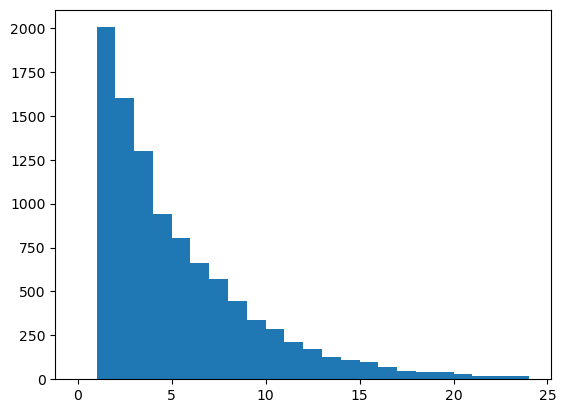

In [143]:
plt.hist(samples, bins = range(25))

In [145]:
#benadering van de verwachtingswaarde
np.mean(samples)

5.0092

## Math oefenopdracht Poisson

Als er gemiddeld random 3 gebeurtenissen per jaar plaatsvinden, wat is de kans op 4 random gebeurtenissen in een jaar?

In [30]:
def poisson(l,k):
    return (l**k * np.exp(-l))/math.factorial(k)

In [31]:
poisson(3,4)

0.16803135574154082

En op minder dan 3?

In [32]:
def poisson_cumulatief(l,k):
    return sum([poisson(l,i) for i in range(k+1)])

In [34]:
poisson_cumulatief(3, 2)

0.42319008112684353

## Poisson probleem 1

In [35]:
# minder dan 2 keer
poisson_cumulatief(3, 1)

0.19914827347145578

In [36]:
#meer dan 3
1-poisson_cumulatief(3, 3)

0.35276811121776874

In [37]:
# 1 keer per 6 maanden
poisson(1.5,1)

0.33469524022264474

## Poisson probleem 2

In [23]:
#1
l_boek = 480/300
l_boek

1.6

In [20]:
#2.1
poisson(l_boek,0)

0.20189651799465538

In [21]:
#2.2
poisson(l_boek, 3)

0.13782802295101812

In [22]:
#2.3
1 - poisson_cdf(l_boek, 2)

0.21664151018073707

## Poisson probleem 3

In [53]:
tel_pdf = [poisson(3,i) for i in range(12)]
tel_cdf = np.cumsum(tel_pdf)

In [51]:
tel_cdf

array([0.04978707, 0.19914827, 0.42319008, 0.64723189, 0.81526324,
       0.91608206, 0.96649146, 0.9880955 , 0.99619701, 0.99889751,
       0.99970766, 0.99992861])

In [54]:
def simulate(size, cdf):
    occurences = np.zeros(size)
    ran = np.random.random(size)
    for i in range(size):
        if ran[i] < cdf[0]:
            occurences[i] = 0
        elif ran[i] < cdf[1]:
            occurences[i] = 1
        elif ran[i] < cdf[2]:
            occurences[i] = 2
        elif ran[i] < cdf[3]:
            occurences[i] = 3
        elif ran[i] < cdf[4]:
            occurences[i] = 4
        else:
            occurences[i] = 5
    return occurences

In [57]:
sum(simulate(365, tel_cdf) ==5)

68

In [163]:
sum(np.random.poisson(3, 365)>4)

73

(array([ 21.,  76., 175., 181., 174., 157., 100.,  55.,  29.,  20.,  12.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <BarContainer object of 11 artists>)

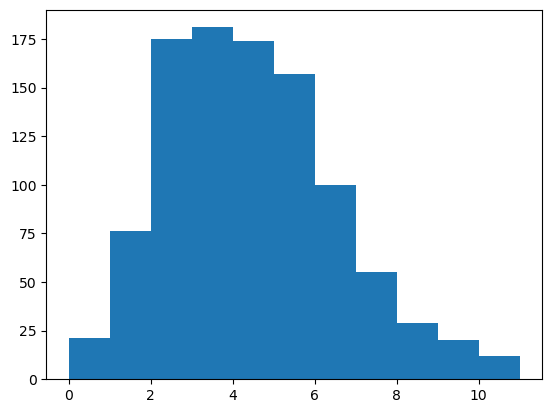

In [168]:
plt.hist(np.random.poisson(4, 1000), bins = range(12))

## Exponentiele verdeling

In [61]:
np.log(3)

1.0986122886681098

In [65]:
def exponential_between(l, a, b):
    return (1-np.exp(-l*b)) - (1-np.exp(-l*a))

In [67]:
exponential_between(np.log(3), 2, 4)

0.09876543209876543

In [176]:
def exp_dist(mu, t):
    return 1/mu*np.exp(-1/mu*t)

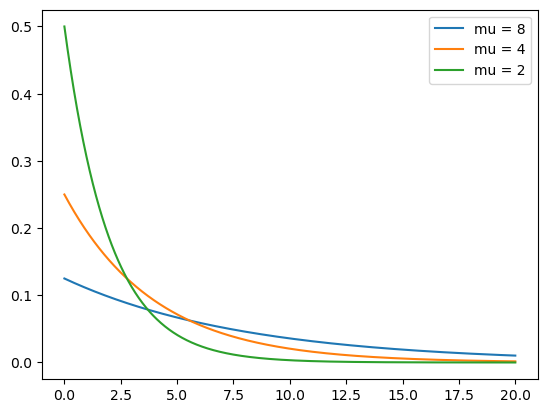

In [183]:
t = np.linspace(0,20,1000)
y_1 = exp_dist(8, t)
y_2 = exp_dist(4, t)
y_3 = exp_dist(2, t)
plt.plot(t,y_1, label = 'mu = 8')
plt.plot(t,y_2, label = 'mu = 4')
plt.plot(t,y_3, label = 'mu = 2')
plt.legend()